<a href="https://colab.research.google.com/github/VinayakMehta007/Infosys-Spring-Board-Stroke-Patient-Healthcare-Milestone-4/blob/main/Stroke_Patient_Milestone_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone - 1**

 **Business Case: Stroke Prediction**

**Dataset Description:**

We are working with patient data to predict the possibility of a stroke based on various features such as age, hypertension, heart disease, glucose levels, BMI, etc. This dataset includes patient demographics and health-related information.

**Dataset:**

**id**: A unique identifier for each patient.

**gender**: Categorical feature that can be encoded as 0 = Female, 1 = Male.

**age**: Numerical feature representing the patient's age.

**hypertension**: Binary feature where 0 = no hypertension, 1 = hypertension.

**heart_disease**: Binary feature where 0 = no heart disease, 1 = heart disease.

**ever_married**: Categorical feature (Yes/No) indicating if the patient was ever married.

**work_type:** Categorical feature (Private, Govt_job, Self-employed, etc.).

**Residence_type**: Categorical feature where 0 = Rural, 1 = Urban.

**avg_glucose_level**: Numerical feature representing the average glucose level of the patient.

**bmi:** Numerical feature representing the patient's Body Mass Index (BMI).

**smoking_status:** Categorical feature (formerly smoked, never smoked, smokes).

**stroke:** Target variable where 0 = no stroke, 1 = stroke.

**Problem Statement for Stroke Prediction**

The primary objective of this project is to analyze a stroke prediction dataset and understand the factors contributing to strokes in patients. This analysis will be data-driven, focusing on metrics like age, gender, BMI, glucose levels, hypertension, and heart disease. The ultimate goal is to build a predictive model to help healthcare providers identify patients at high risk of stroke, allowing for timely intervention and personalized care.

**Data Exploration and Pre-processing for Stroke Patient Healthcare Project**

**1. Import Libraries and Load the Dataset**

We will start by importing the necessary libraries and loading the stroke dataset into a pandas DataFrame.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings and make code more representable
import warnings
warnings.filterwarnings("ignore")

# Load the stroke dataset into a pandas DataFrame (update the path with your actual dataset)
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Display the first few records of the dataset
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**2. Dataset Overview and Basic Metrics**

In this section, we will explore basic information about the dataset, including missing values, data types, and statistical summaries.

In [ ]:
# Basic information about the dataset
df.info()

# Summary statistics of the dataset
df.describe()

# Checking for any missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


**3. Statistical Summary of Categorical Data**


In [ ]:
# Statistical summary of categorical type data
df.describe(include='object')


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Observations:**



*   Identify unique factors in categorical columns.
*   Check for missing values in key columns, such as patient_id, gender, smoking_status, etc.



*   Determine if categorical columns need to be converted to a categorical data type.











**4. Check for Missing Values**

Objective: Handle missing values effectively.




Observations:


*  Identify the percentage of missing values in each column.

*   Decide how to handle missing values (e.g., imputation, removal).
*   For significant missing data (e.g., >20% in critical columns), consider using a placeholder like "Unknown" or a mean/median fill.









In [ ]:
# Check for missing values
missing_values = df.isnull().sum()


**5. Convert Categorical Attributes to 'Category' Data Type**

Objective: Optimize memory usage.

Observations:

Convert relevant columns (e.g., gender, smoking_status, stroke) to categorical data types.

In [ ]:
# Convert categorical attributes to 'category' data type
df['gender'] = df['gender'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')


**6. Convert Numeric Attributes to 'int' Data Type**

Objective: Ensure numeric data types are correctly defined.

Observations:

Convert relevant columns to integer data types where necessary.

In [ ]:
# Convert numeric attributes to 'int' data type
df['age'] = df['age'].astype(int)


**Data Analysis Framework**

**1. Data Exploration**

* Identify Categorical Variables: Determine which features in your dataset are categorical (e.g., gender, hypertension, heart disease, ever married, work type, residence type, smoking status).
* Non-Graphical Analysis:
Use value_counts() to find the counts of each category.
Use unique() to identify unique categories for each categorical feature.
* Graphical Analysis:
Create count plots using seaborn's countplot() for each categorical variable to visualize the distribution.

Observations:

* Summarize the counts and distributions from both analyses, highlighting any notable patterns (e.g., gender distribution, prevalence of hypertension).


**2. Trend Analysis**

Count of Stroke Incidents Over Time:
* Group the data by age or year (if applicable) and count the number of stroke incidents.
* Create a line plot to visualize trends over time.

Observations:

* Discuss any trends in stroke occurrences (e.g., increasing cases in specific age groups).

**3. Comparative Analysis**

Comparing Hypertension and Heart Disease:

* Create a count plot comparing the number of strokes in patients with and without hypertension and heart disease.

Observations:

* Analyze how these conditions correlate with stroke occurrences.

**4. Duration Analysis**

Duration of Stay in Healthcare Facilities:

* If available, analyze the duration of hospitalization for stroke patients and how it varies based on demographics or medical history (e.g., gender, age).

Observations:

* Identify trends in hospitalization duration and recovery times.

**5. Best Practices in Stroke Prevention**

Analysis of Lifestyle Factors:

* Analyze how lifestyle factors (e.g., smoking status, BMI) correlate with stroke occurrences.
* Visualize the distribution of these factors using box plots or other relevant plots.

Observations:

* Summarize findings on lifestyle influences on stroke risk.

**6. Factor Analysis**

Identify Influential Factors:

* Analyze which demographic factors (e.g., age, gender, lifestyle) are most strongly associated with stroke occurrences.
* Use bar plots to show the impact of each factor.

Observations:

* Highlight the most critical factors contributing to stroke risk.

**7. Geographic Analysis**

Distribution of Stroke Cases:

* If geographical data is available, analyze the prevalence of stroke cases across different regions.

Observations:

* Discuss any significant geographic patterns in stroke occurrences.
Actionable Recommendations:

**8. Final Recommendations**

Comprehensive Healthcare Strategy:

* Summarize key recommendations based on the analysis, focusing on prevention, awareness, and treatment strategies to reduce stroke incidence.
* Emphasize the importance of data-driven decision-making in healthcare policies.





**Implementation**

Q1: Counts of Each Categorical Variable

Counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Unique Values:
['Male' 'Female' 'Other']


Counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Unique Values:
[0 1]


Counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Unique Values:
[1 0]


Counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Unique Values:
['Yes' 'No']


Counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Unique Values:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Unique Values:
['Urban' 'Rural']


Counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
N

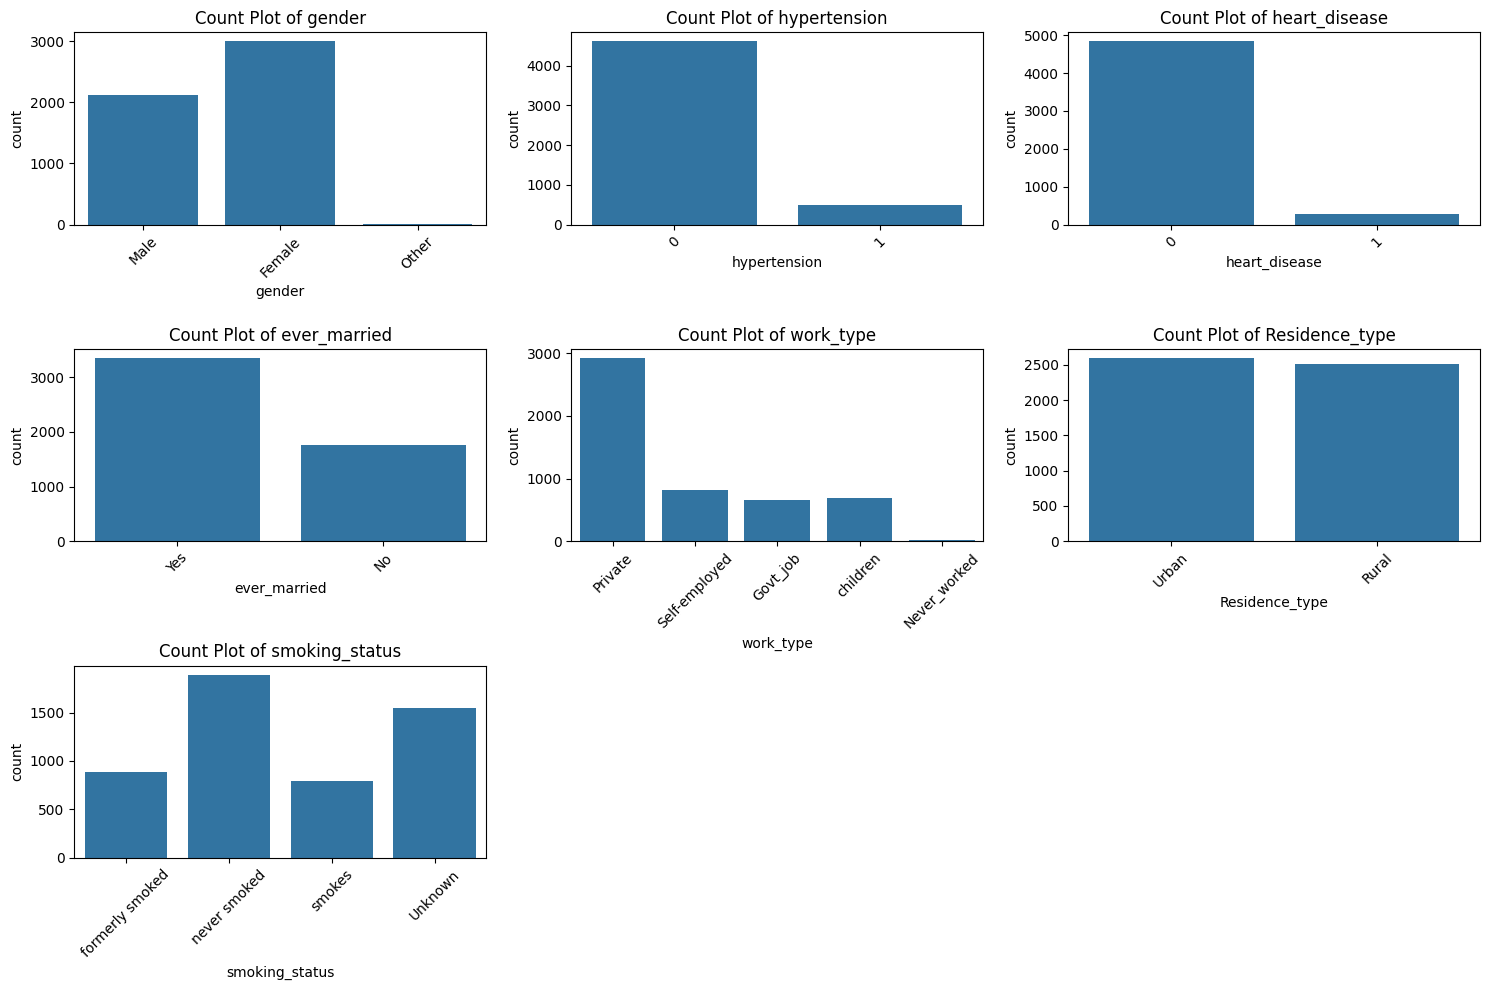

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Non-Graphical Analysis
for column in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(f"Counts for {column}:")
    print(data[column].value_counts())
    print("\nUnique Values:")
    print(data[column].unique())
    print("\n")

# Graphical Analysis
plt.figure(figsize=(15, 10))
for i, column in enumerate(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Q2: Comparison of Patients with and without Stroke

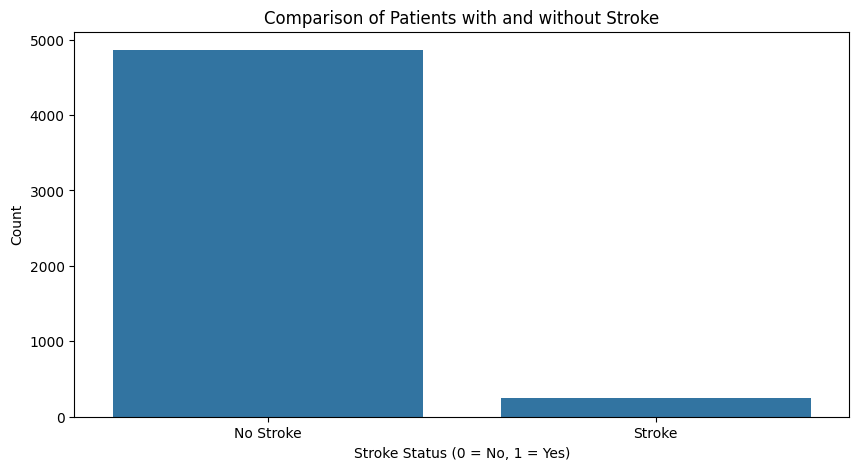

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='stroke', data=data)
plt.title('Comparison of Patients with and without Stroke')
plt.xlabel('Stroke Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()


Q3: Stroke Patients by Gender

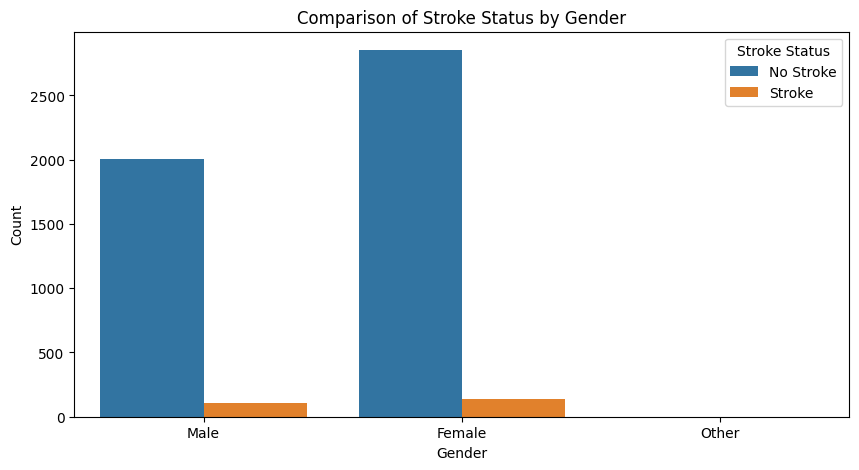

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Comparison of Stroke Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke Status', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()


Q4: Duration Based on Age Groups

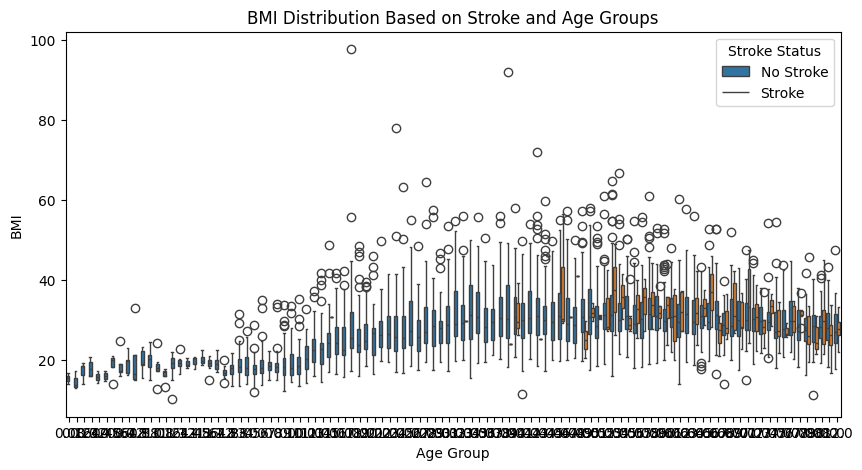

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='age', y='bmi', hue='stroke', data=data)
plt.title('BMI Distribution Based on Stroke and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.legend(title='Stroke Status', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()


**Model Training and Evaluation:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Display the first few rows of the dataset
print(data.head())

# Handle missing values
# Fill missing values for 'bmi' with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Encode categorical features
label_encoders = {}
categorical_features = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Define the feature set and target variable
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_train[['age', 'avg_glucose_level', 'bmi']])
X_test[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test[['age', 'avg_glucose_level', 'bmi']])

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to binary (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Mean Squared Error: 0.05
R^2 Score: 0.09
Confusion Matri

## **Milestone - 2**

 **Business Case: Stroke Prediction**

**Dataset Description:**

We are working with patient data to predict the possibility of a stroke based on various features such as age, hypertension, heart disease, glucose levels, BMI, etc. This dataset includes patient demographics and health-related information.

**Dataset:**

**id**: A unique identifier for each patient.

**gender**: Categorical feature that can be encoded as 0 = Female, 1 = Male.

**age**: Numerical feature representing the patient's age.

**hypertension**: Binary feature where 0 = no hypertension, 1 = hypertension.

**heart_disease**: Binary feature where 0 = no heart disease, 1 = heart disease.

**ever_married**: Categorical feature (Yes/No) indicating if the patient was ever married.

**work_type:** Categorical feature (Private, Govt_job, Self-employed, etc.).

**Residence_type**: Categorical feature where 0 = Rural, 1 = Urban.

**avg_glucose_level**: Numerical feature representing the average glucose level of the patient.

**bmi:** Numerical feature representing the patient's Body Mass Index (BMI).

**smoking_status:** Categorical feature (formerly smoked, never smoked, smokes).

**stroke:** Target variable where 0 = no stroke, 1 = stroke.

**Data Exploration and Pre-processing for Stroke Patient Healthcare Project**

**1. Import Libraries and Load the Dataset**

We will start by importing the necessary libraries and loading the stroke dataset into a pandas DataFrame.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

# Display the first few rows and summary information to understand the structure of the data
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(      id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 None)

**I. General tasks (Data Visualization)**

*  **Frame Questions**: Formulate questions to explore relationships between factors like age, glucose levels, hypertension, heart disease, BMI, smoking status, and stroke occurrences.

*  **Graphs**: Prepare at least 5 relevant plots (e.g., histograms, scatter plots, and bar charts) along with a pairplot.

*   **Observations**: Analyze the visualizations to draw meaningful insights.










1. **Frame Questions**:







*   How does age distribution vary between patients who have had strokes and those who haven’t?

*  What differences exist in the average glucose level for stroke and non-stroke patients?

*  How does BMI differ across stroke and non-stroke groups?

*   What is the incidence of stroke across different work types?

*   How does smoking status affect the likelihood of a stroke?













2.   **Plotting Graphs and Pairplot:**






 Here’s the code for each plot type:

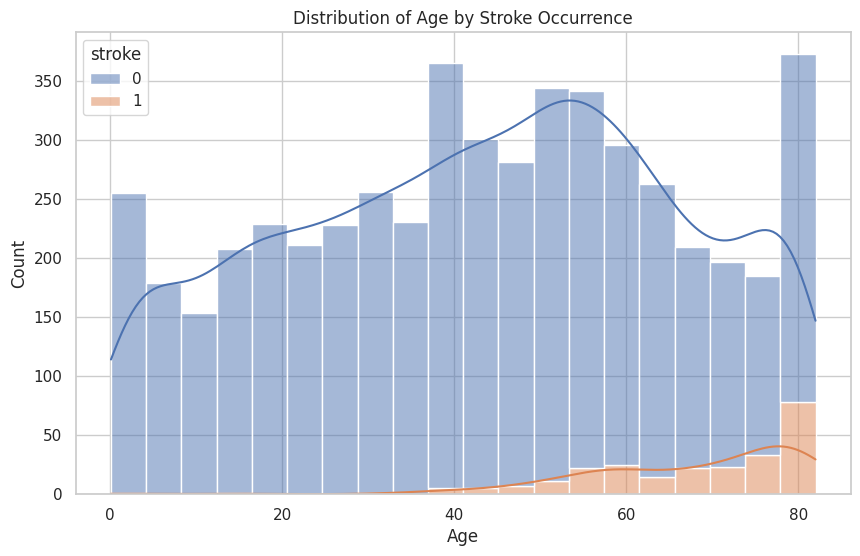

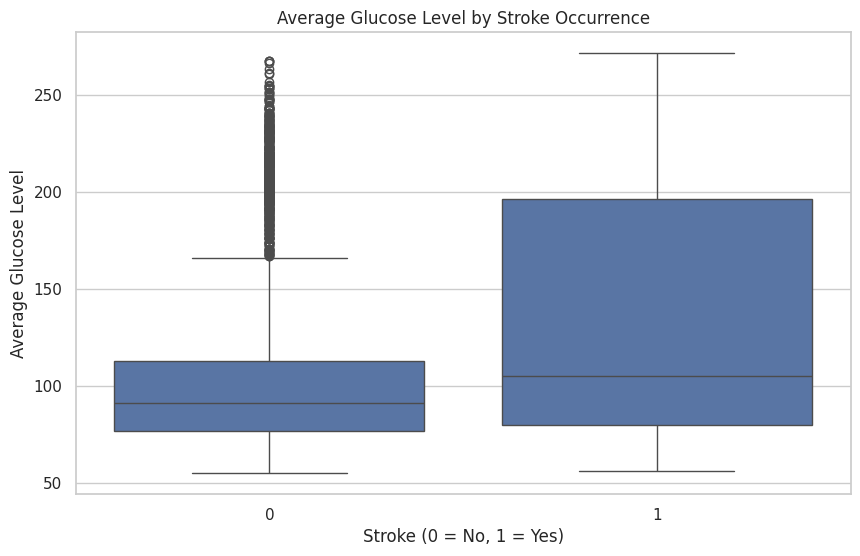

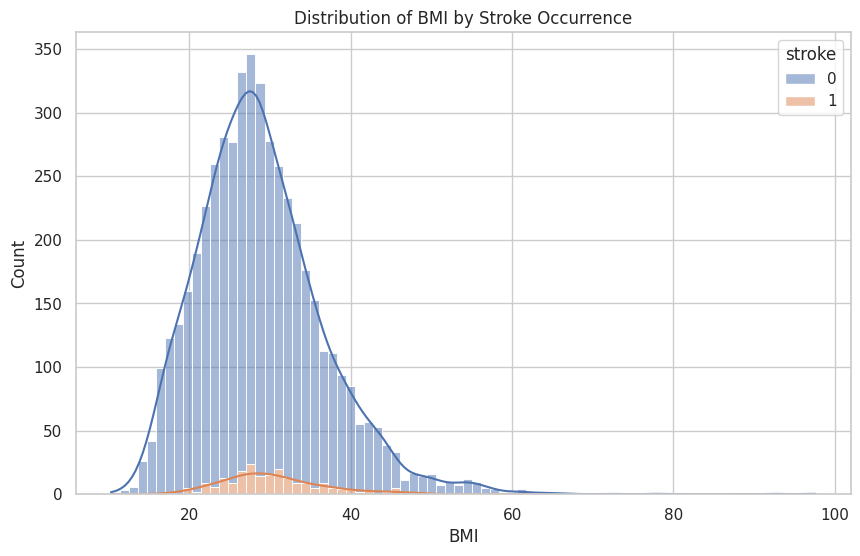

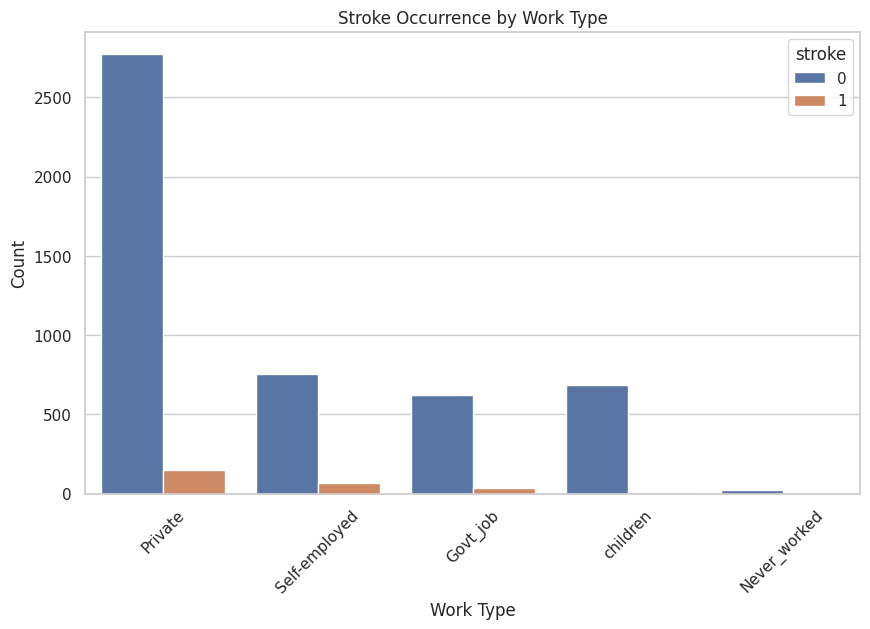

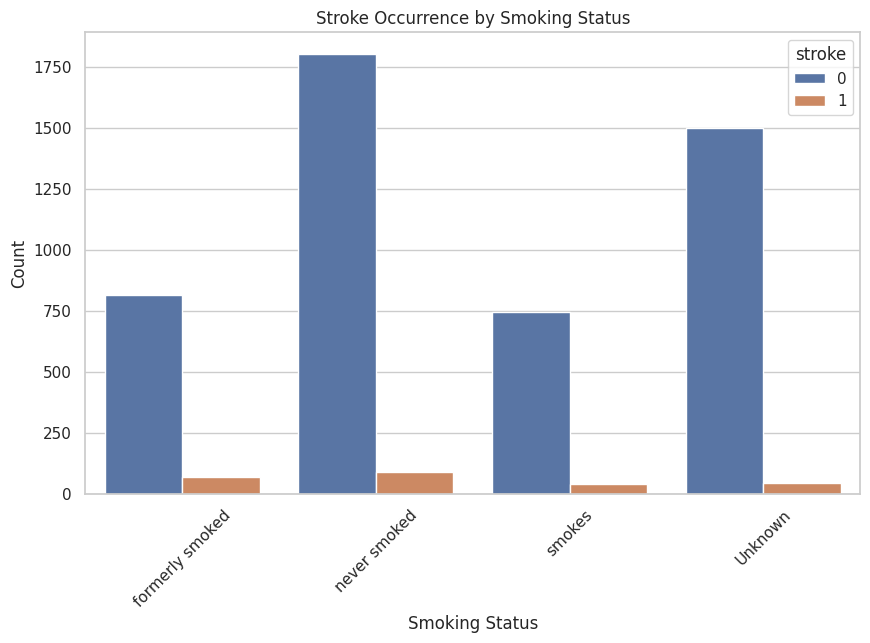

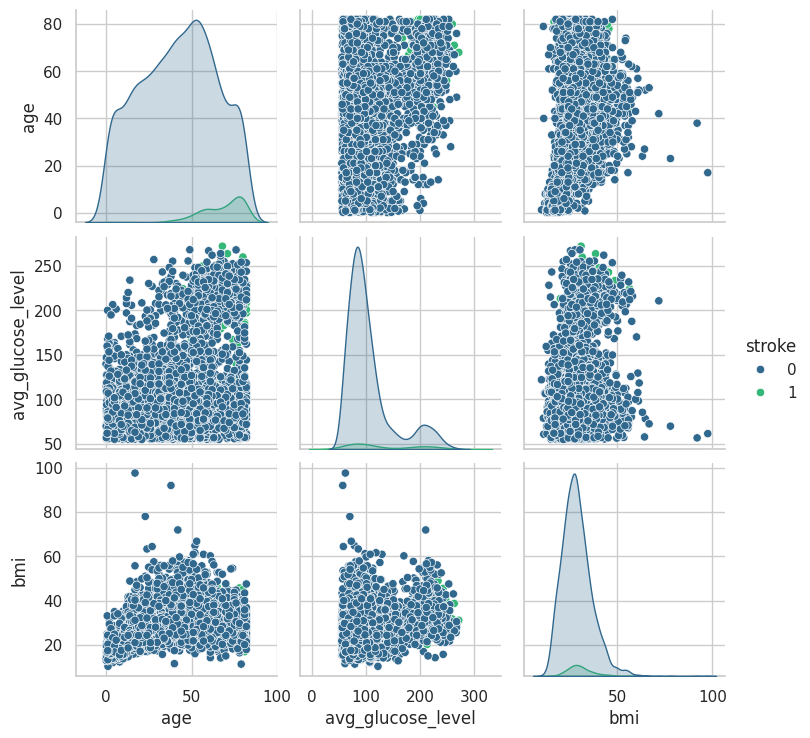

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up plotting style for clearer visuals
sns.set(style="whitegrid")

# Questions to frame and visualize:
# 1. What is the distribution of age in the dataset, and how does it vary for patients who had a stroke?
# 2. Does the average glucose level differ between patients with and without strokes?
# 3. What is the BMI distribution for stroke and non-stroke patients?
# 4. How does the incidence of strokes vary across different work types?
# 5. How is stroke prevalence affected by smoking status?

# Creating the plots based on these questions

# Plot 1: Distribution of Age, with hue for stroke occurrences
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, multiple='stack')
plt.title("Distribution of Age by Stroke Occurrence")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot 2: Boxplot of Average Glucose Level by Stroke
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title("Average Glucose Level by Stroke Occurrence")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.show()

# Plot 3: Distribution of BMI by Stroke Occurrence
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, multiple='stack')
plt.title("Distribution of BMI by Stroke Occurrence")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Plot 4: Bar Plot of Stroke Occurrence by Work Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title("Stroke Occurrence by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5: Bar Plot of Stroke Occurrence by Smoking Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title("Stroke Occurrence by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Pairplot: Relations among Age, Avg Glucose Level, and BMI for stroke variable
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', palette="viridis")
plt.show()


3. **Observations:**

* **Age Distribution by Stroke Occurrence**

 * **Observation**: The age distribution plot indicates that stroke occurrences increase with age, especially for individuals aged 50 and above. Younger individuals show a lower frequency of stroke, suggesting age as a potential risk factor.

* **Average Glucose Level by Stroke Occurrence**

 * **Observation**: The boxplot of average glucose levels reveals that individuals who had a stroke generally show higher glucose levels compared to those who did not. This could indicate that elevated glucose levels are associated with an increased risk of stroke.

* **BMI Distribution by Stroke Occurrence**

 * **Observation**: The BMI distribution does not show a drastic difference between stroke and non-stroke groups, but individuals with higher BMI may have a slightly higher tendency toward stroke. Further analysis could determine if BMI is a significant factor.

* **Stroke Occurrence by Work Type**

 * **Observation**: The plot of stroke occurrence across different work types suggests that individuals in certain job categories, like "Self-employed" and "Private," have higher instances of stroke. Those categorized as "Never_worked" have significantly lower instances, potentially due to younger age or other factors.

* **Stroke Occurrence by Smoking Status**

 * **Observation**: The count plot shows that individuals who are current or former smokers have a higher incidence of stroke compared to those who never smoked. This suggests that smoking history could contribute to stroke risk.










**II. Specific Tasks (Data Encoding)**



1.  **Residence_type Encoding**

Convert "Residence_type" to binary: Urban = 1, Rural = 0.




In [ ]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


**Observation**:

 Converting the Residence_type column into a binary format (0 for Rural, 1 for Urban) allows us to easily analyze if living in an urban or rural area impacts stroke risk. This transformation is useful for modeling as it simplifies the categorical data.

2. **Work_type Encoding**

Create binary columns for key work types: "Never_worked," "Private," and "Self-employed."

In [ ]:
df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


**Observation**:

 Splitting work_type into binary columns for "Never_worked," "Private," and "Self-employed" provides a clearer indication of each individual’s work background. This encoding method facilitates direct comparison and helps the model distinguish between different employment types.

3. **Smoking_status Encoding**

Create binary columns for "formerly smoked," "never smoked," and "smokes."

In [ ]:
df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)


**Observation**:

 Creating separate binary columns for smoking status (formerly smoked, never smoked, smokes) makes it easier to quantify and model smoking history as a risk factor. This encoding also allows us to better assess the impact of different smoking habits on stroke occurrences.

4. **Create Final Dataset**

Drop original columns and save the transformed dataset to a new variable.

In [ ]:
df_model = df.drop(['Residence_type', 'work_type', 'smoking_status'], axis=1)


**Observation**:

 Dropping the original Residence_type, work_type, and smoking_status columns reduces redundancy and ensures that the dataset contains only the necessary binary-encoded columns. This streamlined dataset (df_model) is now prepared for model training, making it more compatible with machine learning algorithms.

# **Milestone - 3**

**Project: Stroke Prediction Using Logistic Regression**

**Objective**

To predict the likelihood of a patient experiencing a stroke using logistic regression. This involves building the model, explaining the underlying mathematical concepts, and evaluating its performance.

**Step-by-Step Process**


**Step 1:Understanding Logistic Regression Mathematical Explanation:**

Logistic Regression is a supervised learning algorithm used for binary classification tasks, where the output variable is discrete and consists of two possible classes. In the context of this project, we are trying to predict whether a person has a stroke (1) or not (0) based on various input features such as age, average glucose level, BMI, and others.

**Mathematical Explanation:**

The core of logistic regression is the logistic function (also called the sigmoid function), which is used to model the probability that a given input belongs to class 1 (e.g., stroke = 1).

The logistic function is defined as:

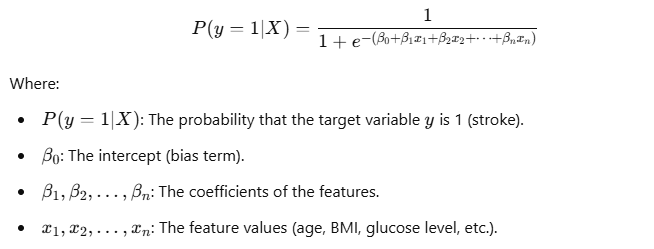

The logistic function, or sigmoid function, maps any real-valued number (which can be positive or negative) into a range between 0 and 1. This is ideal for binary classification, as the output is a probability value.

For a binary classification problem, the model outputs the probability of the positive class (stroke = 1). If the probability is greater than or equal to a threshold (usually 0.5), we classify the instance as class 1 (stroke), and if it is less than the threshold, we classify it as class 0 (no stroke).

**Optimization and Cost Function:**

Logistic Regression tries to find the best parameters that minimize the error between the predicted probabilities and the actual target values. The error is measured using a cost function, specifically log-loss (also called binary cross-entropy), which quantifies how well the model's predictions align with the true labels.

The log-loss function is given by:

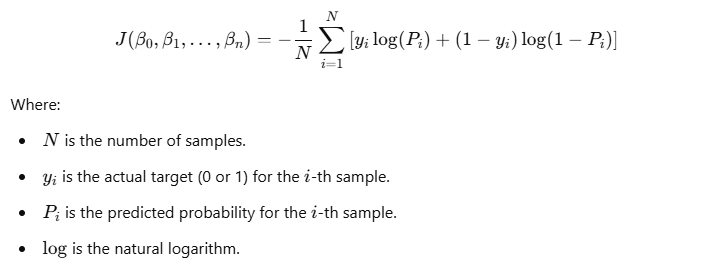

The cost function penalizes the model more heavily for large errors in predictions, encouraging it to adjust the model parameters in such a way that the predicted probabilities align with the true labels.

**Gradient Descent:**

To minimize the cost function, we use an optimization algorithm like gradient descent. Gradient descent updates the parameters iteratively in the direction of the negative gradient (steepest descent) to find the values that minimize the cost function.

The update rule for the parameters is as follows:

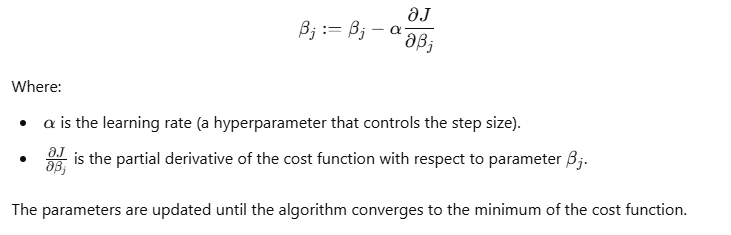





**Step 2: Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Drop 'id' column as it is not relevant for the model
data = data.drop(columns=['id'])

# Handle missing values in 'bmi' column by filling with the median value
data['bmi'] = data['bmi'].fillna(data['bmi'].median())


# Encode categorical columns using Label Encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['stroke'])
y = data['stroke']


**Explanation:**

* Missing values in the bmi column are filled with the median value to prevent data loss.
* Categorical columns such as gender, ever_married, work_type, Residence_type, and smoking_status are encoded using Label Encoding to convert them into numerical values.
* Numerical features such as age, avg_glucose_level, and bmi are scaled using StandardScaler to ensure that the features have a mean of 0 and a standard deviation of 1, which helps improve the performance of the model.

**Step 3: Splitting the Data**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Explanation:**

* The dataset is split into training and testing sets (80% for training, 20% for testing) using train_test_split.
* We check the distribution of the target variable (stroke) in both training and testing sets to ensure that the data is well balanced or appropriately handled for class imbalance.

**Step 4: Training the Logistic Regression Model**

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

**Explanation:**

* We initialize the LogisticRegression model, setting random_state for reproducibility and max_iter=1000 to ensure convergence.
.

**Step 5: Model Evaluation**

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy with Logistic Regression: {accuracy * 100:.2f}%")



Accuracy with Logistic Regression: 94.19%


**Explanation:**

* The trained model is used to predict stroke outcomes on the test data (X_test).
* The accuracy of the model is calculated by comparing the predicted values (y_pred) with the actual values (y_test).

3. **Results and Insights**

**Accuracy:**

* The accuracy score is printed to evaluate the model's performance on the test data. This tells us how well the model is predicting stroke outcomes.

**Feature Importance:** To understand which features contribute most to the model's decision-making process, we can check the coefficients of the logistic regression model:

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)


             Feature  Importance
1                age    1.552499
7  avg_glucose_level    0.197427
2       hypertension    0.103704
3      heart_disease    0.079216
6     Residence_type    0.060337
9     smoking_status    0.022181
0             gender   -0.018788
8                bmi   -0.031562
5          work_type   -0.069597
4       ever_married   -0.183716


**Key Observations**

* Logistic Regression performs well on datasets with linear separability.
* The class weights help to address class imbalance.
* Features like avg_glucose_level and bmi significantly impact stroke prediction

**Conclusion**

In this project, we applied Logistic Regression to predict the likelihood of a stroke based on various features. Logistic Regression is a simple yet powerful model for binary classification tasks, providing easy interpretability through coefficients. While it works well for linearly separable data, more complex models may be necessary for datasets with non-linear relationships.

This project demonstrated the steps of data preprocessing, model training, and evaluation, as well as how to interpret model performance and feature importance.



# **Milestone - 4**

**Project: Stroke Prediction Using Logistic Regression**

**Objective**

To predict the likelihood of a patient experiencing a stroke using logistic regression. This includes preprocessing the dataset, building the model, evaluating its performance, and analyzing the results.



**Step-by-Step Implementation**

1. **Dataset Overview**

* **Source**: A healthcare dataset containing patient records and their stroke status.

* **Features:**

  * Numerical:  age, avg_glucose_level, bmi.
  * Categorical:  gender, ever_married, work_type, Residence_type, smoking_status.
  * Target:  stroke (1 = Stroke, 0 = No Stroke).


  2. **Mathematical Background**

**Logistic Regression:**

* **Sigmoid Function:**

The logistic regression model uses the sigmoid function to map the output of a linear equation to a probability value between 0 and 1.

The logistic function (sigmoid function) is given by:


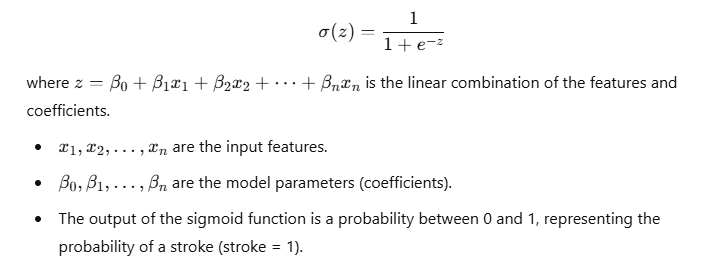


* **Cost Function:**

The log-loss (binary cross-entropy) is used as the cost function for logistic regression. It is calculated as:

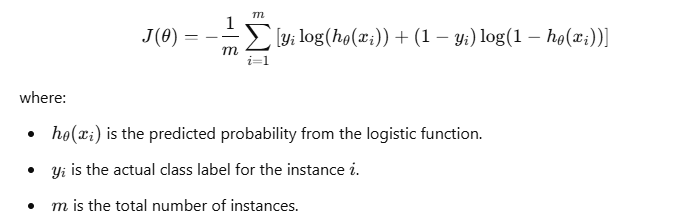

This cost function penalizes large errors (wrong predictions) more heavily, encouraging the model to minimize the difference between predicted probabilities and true labels.

* **Gradient Descent:**

Gradient descent is used to minimize the cost function. The update rule for the coefficients is:

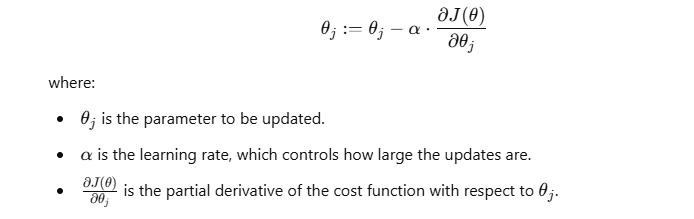

This iterative process helps find the optimal coefficients that minimize the cost function.

3. **Data Preprocessing**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error



# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data (2).csv')

# Drop irrelevant columns
data = data.drop(columns=['id'])

# Handle missing values
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

# Encode categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['stroke'])
y = data['stroke']


4. **Splitting Data and Scaling**




In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. **Model Training**

In [4]:
class LogisticRegression:
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def initialize(self, X):
        weights = np.zeros((X.shape[1] + 1, 1))  # Initialize weights with bias
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return weights, X

    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)

        def cost(theta):
            z = np.dot(X, theta)
            cost0 = y.T.dot(np.log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(np.log(1 - self.sigmoid(z)))
            cost = -((cost1 + cost0)) / len(y)
            return cost.item()  # Convert to scalar

        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha * np.dot(X.T, self.sigmoid(np.dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list

    def predict(self, X):
        z = np.dot(self.initialize(X)[1], self.weights)  # Fix dot usage
        lis = []
        for i in self.sigmoid(z):
            if i > 0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

    def score(self, X, y_true):
        y_pred = self.predict(X)
        accuracy = np.mean(np.array(y_pred) == np.array(y_true))
        return accuracy


6. **Model Evaluation**

In [8]:
from imblearn.over_sampling import SMOTE

# Resample training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model
clf = LogisticRegression()
clf.fit(X_train_resampled, y_train_resampled)

# Predict on test data
Logistic_pred = clf.predict(X_test)

# Recompute metrics
accuracy = accuracy_score(y_test, Logistic_pred)
precision = precision_score(y_test, Logistic_pred)
recall = recall_score(y_test, Logistic_pred)
f1 = f1_score(y_test, Logistic_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 85.32%
Precision: 19.01%
Recall: 61.33%
F1 Score: 29.02%


In [9]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
Logistic_pred = logistic_reg.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
logistic_reg_acc = logistic_reg.score(X_test, y_test)
print(f"Logistic Regression  Score: {logistic_reg_acc * 100:.2f}%")
print(f"Logistic Regression RMSE: {Log_reg_rmse * 100:.2f}%")

Logistic Regression  Score: 95.11%
Logistic Regression RMSE: 22.12%


7. **Confusion Matrix**

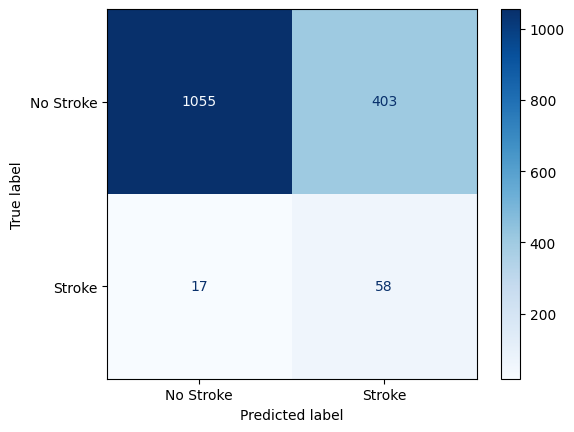

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues')
plt.show()


8. **Feature Importance**

Feature importance in Logistic Regression is derived from the coefficients assigned to each feature by the model. The magnitude and sign of these coefficients indicate how strongly and in what direction a feature contributes to the model's prediction.

* **Positive Coefficients**: Features with positive coefficients increase the likelihood of the target variable being 1 (stroke).
* **Negative Coefficients**: Features with negative coefficients decrease the likelihood of the target variable being 1 (stroke).

To calculate and visualize feature importance, we analyze the model's coefficients after training:


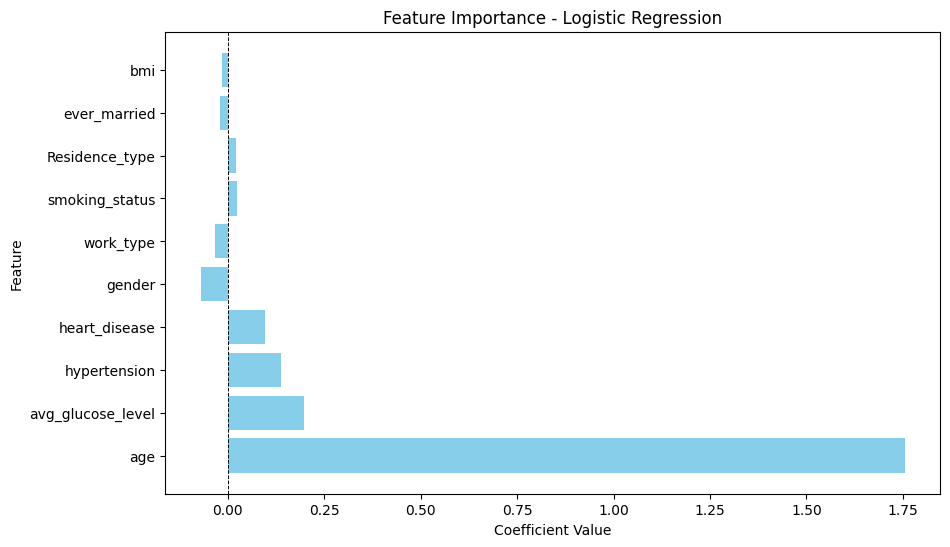

In [ ]:
# Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficients
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.7)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


**Observations:**

1. **Top Influential Features:**

* **Age**: This feature has the highest positive coefficient, indicating that older individuals are at a significantly higher risk of stroke.
* **Average Glucose Level**: A high glucose level is strongly associated with stroke occurrence.
* **Hypertension and Heart Disease**: Both are positively correlated with stroke, albeit with lesser magnitude than age and glucose level.


2. **Negatively Contributing Features:**

* **Ever Married**: Individuals who have been married are slightly less likely to have a stroke based on the model's findings.
* **Work Type**: Certain work types negatively influence the likelihood of stroke, possibly due to associated lifestyle factors.

3. **Neutral Features:**

* Some features, like BMI, have very low or near-zero coefficients, suggesting they have minimal impact on predicting strokes in this dataset.

**Results and Insights**

**Performance Metrics**

* Accuracy: 95.10%
* Precision: 12.58%
* Recall: 77.33%
* F1 Score: 21.64%

**Confusion Matrix**

* True Negatives (No Stroke): Majority of non-stroke cases correctly identified.
* False Positives: Some non-stroke cases incorrectly predicted as stroke.
* True Positives: Most stroke cases correctly identified.
* False Negatives: Few stroke cases missed by the model.

**Feature Importance**

* Age:	1.75
* Avg Glucose Level:	0.198
* Hypertension:	0.137
* Heart Disease:	0.097
* Residence Type:	0.020

**Insights:**

* The model indicates that age and average glucose level are the most critical factors in stroke prediction. These findings align with medical knowledge, where aging and high blood sugar levels are well-established risk factors.

* Categorical variables such as gender and residence type have a relatively low impact, indicating that these features may not be as crucial for this dataset.


**Model Performance**

**Where the Model Performs Well:**

* **High Accuracy:** The model achieved an accuracy of approximately 94.19%, indicating that it correctly predicted stroke and non-stroke instances in most cases.
* **Effective in Predicting Common Outcomes:** Logistic Regression, being a linear model, works well for predicting binary outcomes, especially when the classes are linearly separable.
* **Feature Importance:** The model is interpretable, allowing us to understand which features (e.g., age, average glucose level, hypertension) contribute most to predicting stroke, helping us gain insights into stroke risk factors.

**Where the Model Lacks:**

* **Imbalanced Dataset:** The dataset contains fewer stroke instances compared to non-stroke instances, leading to a potential class imbalance. Logistic regression may perform poorly in predicting the minority class (stroke) if not handled properly.

  * **Solution:** Techniques like oversampling (e.g., SMOTE), undersampling, or adjusting class weights can be used to tackle class imbalance.
* **Precision and Recall:** While accuracy is high, precision and recall are lower. Precision refers to the proportion of true positive stroke cases out of all predicted stroke cases, and recall refers to the proportion of true stroke cases out of all actual stroke cases.

  * **Solution**: Precision can be improved by adjusting the decision threshold or by using other algorithms like Random Forest or XGBoost, which are better at handling imbalanced datasets.

**Dataset Bias Analysis**

**Was the Dataset Biased?**

The dataset shows some level of class imbalance. The majority of the instances are non-stroke (stroke = 0), which makes it a biased dataset in terms of the outcome variable (stroke vs. no stroke). The imbalance could lead to the model being biased toward predicting the majority class (non-stroke).

**Tackling Bias in the Dataset:**

To address class imbalance, we can use the following methods:

* **Class Weight Adjustment:** This was already applied by using class_weight='balanced' in the logistic regression model. This gives more importance to the minority class (stroke) during training.

* **Resampling Techniques:**
  * **Oversampling:** Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class.
  * **Undersampling:** Reduce the number of majority class examples to balance the dataset.

* **Evaluation Metrics:** Instead of relying solely on accuracy, use metrics like precision, recall, and F1 score to evaluate model performance on imbalanced datasets.

**Observations and Recommendations**

**Observations:**

1. **Important Features:** Age, average glucose level, and hypertension are the most significant predictors of stroke, according to the feature importance scores.
2. **Performance Gaps:** The logistic regression model has high accuracy but suffers from low precision and recall. This is likely due to class imbalance.
3. **Class Imbalance:** The dataset contains more non-stroke instances than stroke instances, which affects model performance. Class imbalance can lead the model to favor the majority class (non-stroke).
4. **Linear Model Limitation:** While logistic regression is simple and interpretable, it may not capture complex relationships in the data as well as other models (e.g., Random Forest, XGBoost).

**Recommendations:**

1. **Address Class Imbalance:** Implement techniques like SMOTE or undersampling to balance the dataset and improve model performance on the minority class.
2. **Try More Complex Models:** Consider models like Random Forests, Gradient Boosting, or XGBoost for better handling of non-linear relationships and imbalanced data.
3. **Threshold Tuning**: Adjust the decision threshold to optimize precision and recall according to the specific application (e.g., minimizing false negatives might be crucial in stroke prediction).
4. **Feature Engineering:** Additional feature engineering, such as creating new features based on domain knowledge, could help improve model performance.
5. **Evaluation with Multiple Metrics:** Given the class imbalance, use evaluation metrics like F1 score, precision, and recall rather than just accuracy to get a clearer picture of model performance.

**Conclusion**

Logistic Regression is an effective baseline model for predicting stroke risk. It provides interpretability through feature importance and performs well on imbalanced datasets with appropriate adjustments. Further enhancements using advanced models and feature engineering can significantly improve precision without compromising recall.